In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\jiangchun.li.ext.AXA-DIL\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## test regressor

In [2]:
test_ross = joblib.load('test_ross.pkl')

ross_data = test_ross['data']
ross_features = test_ross['features']
ross_target = test_ross['target']
ross_model = test_ross['rf_model']

#### (model: regression, feature_type: binary)

In [ ]:
axes = target_plot(df=ross_data, feature='SchoolHoliday', feature_name='SchoolHoliday', target='Sales', figsize=(15, 8))

#### (model: regression, feature_type: one-hot)

In [ ]:
axes = target_plot(df=ross_data, feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
                   feature_name='StoreType', target='Sales', figsize=(15, 8))

In [ ]:
# modify returned axes
axes = target_plot(df=ross_data, feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
                   feature_name='StoreType', target='Sales', figsize=(15, 8))
_ = axes[2].set_ylabel('Average Sales')

#### (model: multi-class, feature_type: numeric)

In [ ]:
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', figsize=(15, 8))

In [ ]:
# show percentile
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', 
                   target='Sales', figsize=(15, 8), show_percentile=True)

In [ ]:
# more grids, use xticks_rotation
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', 
                   target='Sales', num_grid_points=20, plot_params={'xticks_rotation': 90}, figsize=(15, 8))

In [ ]:
# percentile_range
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                   num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 8), show_percentile=True)

In [ ]:
# equal grid_type
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                   num_grid_points=10, grid_type='equal', figsize=(15, 8))

In [ ]:
# grid_range
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                   num_grid_points=10, grid_type='equal', grid_range=(5, 50), figsize=(15, 8))

In [ ]:
# provide the Axes to plot on
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style('whitegrid')
ax1 = sns.distplot(ross_data['weekofyear'].values, color='#5BB573', ax=axes[0])
ax1.set_title('weekofyear distribution\n')
ax1.set_xlabel('weekofyear')
ax2 = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target=ross_target, 
                  ax=axes[1], show_percentile=False, plot_params={'xticks_rotation': 90})

In [ ]:
# customized grid points
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                   cust_grid_points=range(1, 54), plot_params={'xticks_rotation': 90}, figsize=(15, 8))

In [ ]:
# customized grid points
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                   cust_grid_points=range(1, 54), figsize=(15, 8))
_ = axes[1].set_xticklabels(range(1, 53))

In [ ]:
plot_params = {
    'font_family': 'Verdana',
    'title': 'Average Sales through weekofyear',
    'subtitle': 'Average sales through weekofyear',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_color': '#3288bd',
    'bar_color': 'lightblue',
    'line_width': 1,
    'xticks_rotation': 0
}
axes = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                   plot_params=plot_params, figsize=(15, 8), show_percentile=True)

# test target plot interact

In [3]:
from pdpbox.info_plots import target_plot_interact

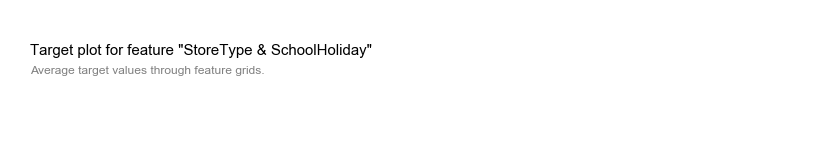

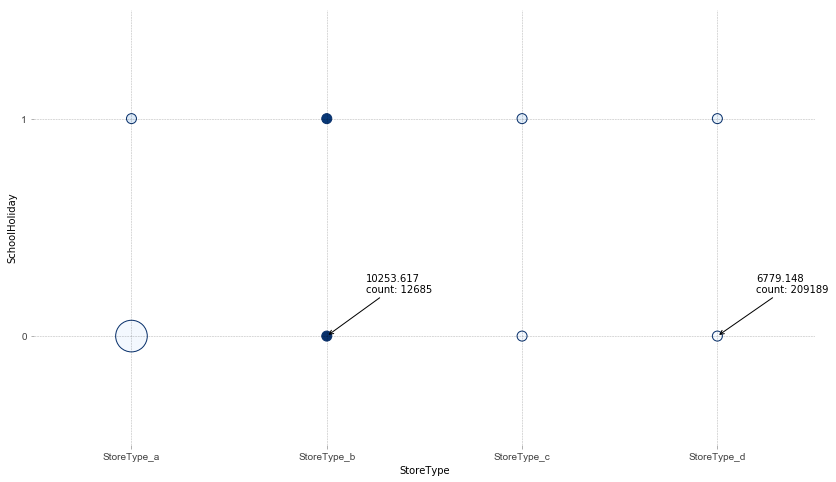

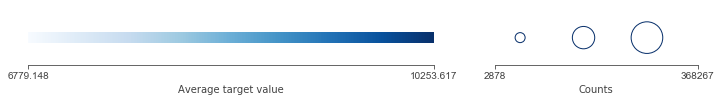

In [4]:
axes = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                    'SchoolHoliday'], feature_names=['StoreType', 'SchoolHoliday'], 
                            target=ross_target, figsize=(14, 8))

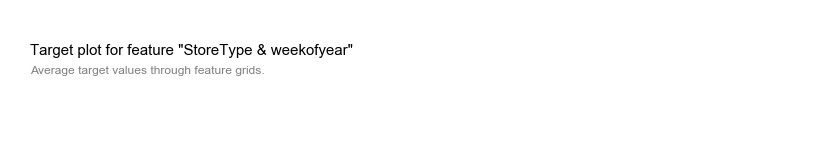

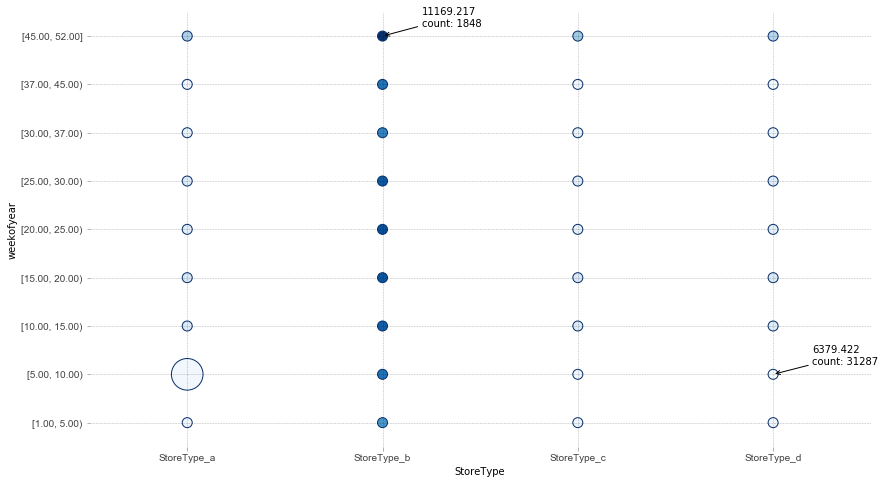

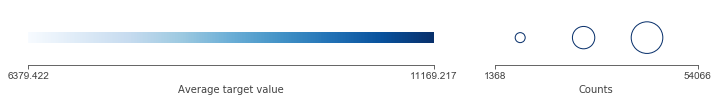

In [5]:
axes = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                    'weekofyear'], feature_names=['StoreType', 'weekofyear'], 
                            target=ross_target, figsize=(14, 8))

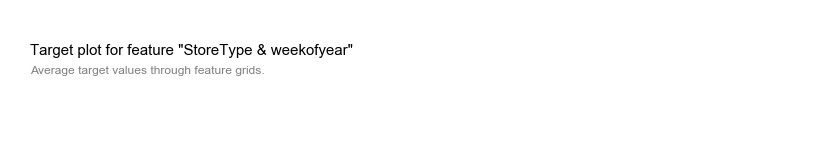

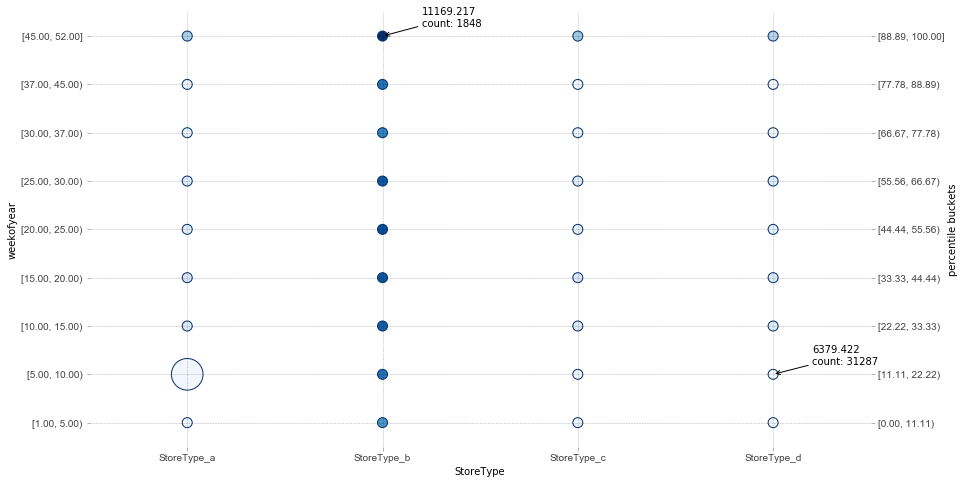

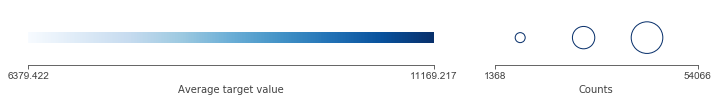

In [6]:
axes = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                    'weekofyear'], feature_names=['StoreType', 'weekofyear'], 
                            target=ross_target, figsize=(14, 8), show_percentile=True)

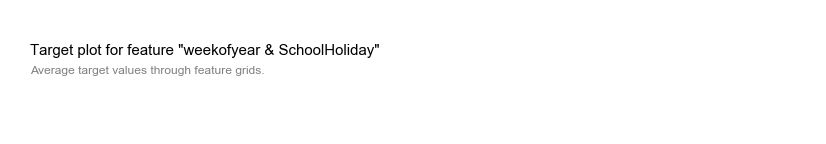

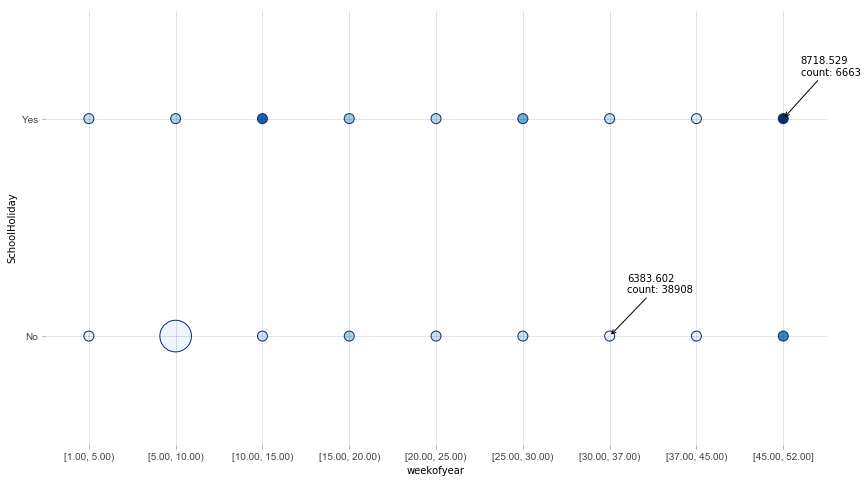

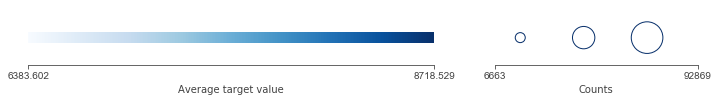

In [7]:
axes = target_plot_interact(df=ross_data, features=['weekofyear', 'SchoolHoliday'], feature_names=['weekofyear', 'SchoolHoliday'], 
                            target=ross_target, figsize=(14, 8))
_ = axes[1].set_yticklabels(['No', 'Yes'])